Dataset extracted from: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df = pd.read_csv('Salary_dataset.csv')

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.shape

(30, 2)

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
df.duplicated().sum()

0

In [11]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


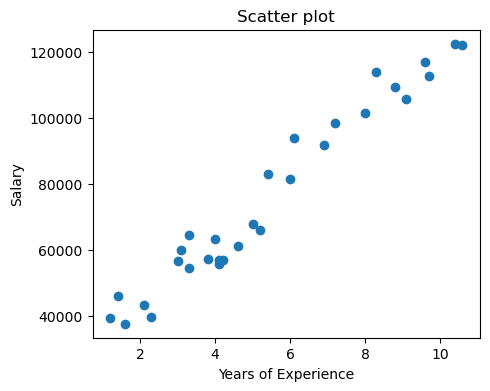

In [12]:
x = df['YearsExperience']
y = df['Salary']
plt.figure(figsize=(5,4))
plt.scatter(x, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter plot')
plt.show()

In [13]:
x = df['YearsExperience'].values.reshape(-1,1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(model.coef_) 
print(model.intercept_)

[9423.81532303]
24380.20147947369


y = 9424x + 24380

In [18]:
y_pred = model.predict(X_test)

In [19]:
# Calcular as métricas de erro
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir os resultados
print('Mean Square Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Square Error: 49830096.855908334
Mean Absolute Error: 6286.453830757745
R2 Score: 0.9024461774180498


> The smaller the value of MSE, the better the model's performance. The unit of measure for MSE is the square of the unit of the response variable. For example, if you are working with salary predictions in dollars, the MSE will be in square dollars.

> The smaller the value of MAE, the better the model's performance. The unit of measure for MAE is the same as the response variable. For example, if you are working with salary predictions in dollars, the MAE will be in dollars.

> In summary, both MSE and MAE are evaluation metrics for the performance of a regression model, measuring the discrepancy between predicted and actual values. Both are useful for comparing different models and choosing the one that best fits the data, with MSE being more sensitive to large errors due to squaring the errors in its calculation. On the other hand, MAE is less sensitive to outliers as it calculates the average absolute errors.

> R2 score provides a measure of how well the model fits the data and explains the variability of the response variable. R2 ranges from 0 to 1. R2 = 0 means that the model fails to explain any variation in the data. It's as if all the model's predictions are equal to the mean of the response variable. R2 = 1 means that the model perfectly explains the variation in the data. All the model's predictions exactly coincide with the actual values of the response variable. The closer the R2 score is to 1, the better the model fits the data. For example, if the R2 score is 0.90, it means that the model explains approximately 90% of the variability in the data. This indicates a good fit of the model, as most of the variations in the response variable are captured by the explanatory variables. R2 score has some limitations. It can be misleading when applied to models with high complexity or when used to compare models with different datasets. Additionally, the R2 score does not provide information about the statistical significance of the coefficients or the quality of individual model predictions. Therefore, when interpreting the R2 score, it is essential to consider other metrics and additional analyses to gain a comprehensive view of the performance and quality of the regression model.

Based on the presented metrics, we can make the following interpretations:

> Mean Square Error (MSE): The MSE has a value of 49830096.855908334. It's important to note that MSE is a metric that represents the average of squared errors. Therefore, a higher value indicates a greater dispersion of errors. In this case, the MSE value seems high, which may indicate that the model is making considerable errors in its predictions.

> Mean Absolute Error (MAE): The MAE has a value of 6286.453830757745. This metric represents the average absolute error of the model's predictions. A lower value indicates better performance of the model. In this case, the MAE value is relatively high, suggesting that the model is making considerable errors in its predictions.

> R2 Score: The R2 score has a value of 0.9024461774180498. This metric ranges from 0 to 1, where values closer to 1 indicate a better fit of the model to the data. In this case, the value of 0.9024 indicates that the model is able to explain approximately 90.24% of the variability in the data. This suggests that the model has a relatively good fit to the data.

Considering these metrics, we can say that the model has reasonable performance, but there is still room for improvement. The MSE and MAE suggest that the model is making considerable errors in its predictions, indicating some dispersion and distance between the predictions and the actual values. However, the R2 score indicates that the model is able to explain a significant percentage of the data variability.

In summary, although the model is not perfect, it appears to have a reasonable ability to make predictions based on the provided metrics. It is always recommended to analyze other metrics, perform cross-validation, and consider the specific context of the problem to assess the overall performance and suitability of the model.

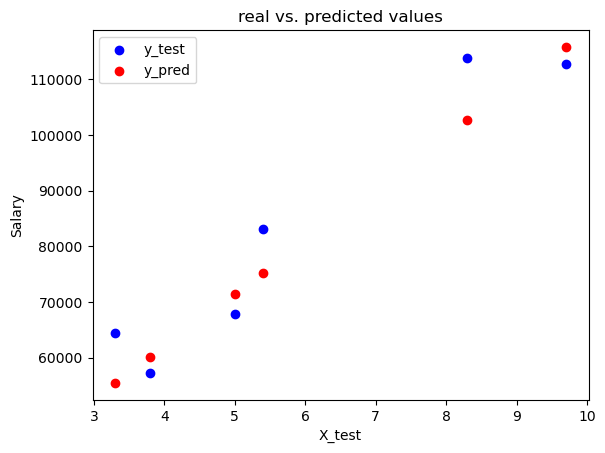

In [20]:
plt.scatter(X_test, y_test, color='blue', label='y_test')
plt.scatter(X_test, y_pred, color='red', label='y_pred')

# Configurações do gráfico
plt.xlabel('X_test')
plt.ylabel('Salary')
plt.title('real vs. predicted values')
plt.legend()

# Exibir o gráfico
plt.show()


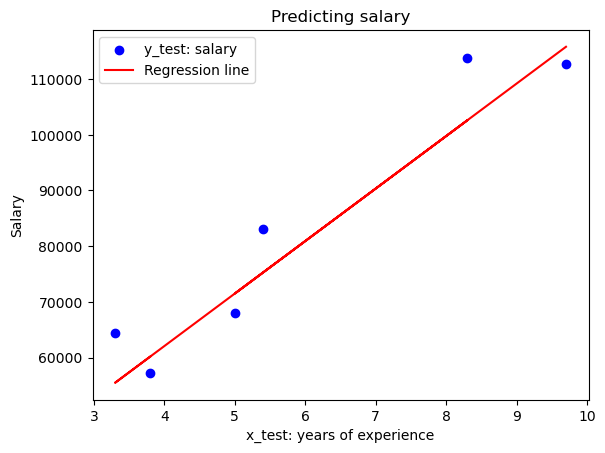

In [21]:
# Plotar gráfico de dispersão
plt.scatter(X_test, y_test, color='blue', label='y_test: salary')
plt.plot(X_test, y_pred, color='red', label='Regression line')

# Configurações do gráfico
plt.xlabel('x_test: years of experience')
plt.ylabel('Salary')
plt.title('Predicting salary')
plt.legend()

# Exibir o gráfico
plt.show()

##### Conclusion
> Although the model explains approximately 90% of the variability in the data, the dataset should be larger so that the model can make more accurate predictions. Another possibility would be to have more features in the dataset.

> Work in progress: Try different models: In addition to simple linear regression, I am gonna try other regression models such as polynomial regression, decision trees, random forests, or machine learning-based models to see if they offer better performance.